In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [20]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [21]:
y.index = y.name

In [22]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [23]:
y.index = pd.to_datetime(y.index)

In [24]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [25]:
from pytrends.request import TrendReq

In [26]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["machine", "strong economy", "Apple", "NASDAQ", "mobile phones", "internet",
            "chairs", "snow", "water"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [27]:
X = df.resample("Q").mean()

In [28]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso(alpha = .5)

In [34]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [35]:
coefficients = lasso.coef_

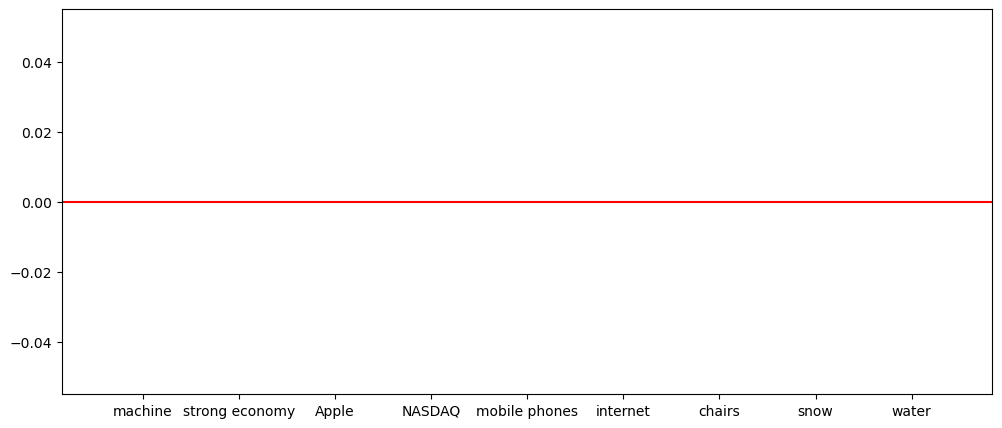

In [36]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Based from the above plot, the coefficients of all the search terms were reduced to zero. This is probably due to the high value of alpha that was assigned. Because the alpha value was too high, the coefficients for the search terms were penalized too much.

If we set alpha lower, we can see that the coefficient of the relevant search terms are no longer reduced to zero. For instance, we look at the plot when alpha = 0.1 as shown below:

In [37]:
lasso = Lasso(alpha = .1)

In [38]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [39]:
coefficients = lasso.coef_

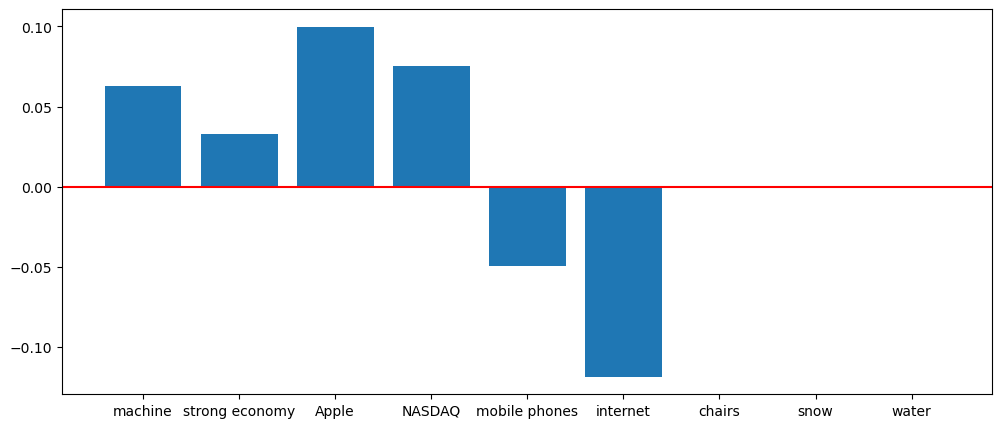

In [40]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.show()